# Process ICLR Data 

In [4]:
import json

def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def filter_accepted_papers(papers):
    return [paper for paper in papers if paper['status'] not in ['Withdraw', 'Reject']]

def search_keyword(paper, keyword):
    for key in ['title', 'keywords', 'primary_area']:
        if keyword.lower() in paper.get(key, '').lower():
            return True
    return False

def search_keywords(paper, keywords):
    for key in ['title', 'keywords', 'primary_area']:
        if any(keyword in paper.get(key, '').lower() for keyword in keywords):
            return True
    return False

def calculate_statistics_keywords_union(papers, keywords):
    accepted_papers = filter_accepted_papers(papers)
    keyword_papers = [paper for paper in accepted_papers if search_keywords(paper, keywords)]
    
    total_accepted = len(accepted_papers)
    total_keyword = len(keyword_papers)
    ratio = total_keyword / total_accepted if total_accepted > 0 else 0
    
    return {
        'total_accepted': total_accepted,
        'total_keyword': total_keyword,
        'ratio': ratio
    }
    
def calculate_statistics(papers, keywords):
    accepted_papers = filter_accepted_papers(papers)
    total_accepted = len(accepted_papers)
    stats = {}
    for keyword in keywords:
        count = sum(search_keyword(paper, keyword) for paper in accepted_papers)
        ratio = count / total_accepted if total_accepted > 0 else 0
        stats[keyword] = {'count': count, 'ratio': ratio}
    return stats

## ICLR 2024

In [8]:
file_path_2024 = 'iclr2024.json'
keywords_2024 = ['robot', 'benchmark']

papers_2024 = load_json(file_path_2024)
stats_2024 = calculate_statistics(papers_2024, keywords_2024)

print(f"Total accepted papers: {len(filter_accepted_papers(papers_2024))}")
for keyword, data in stats_2024.items():
    print(f"Papers with '{keyword}': {data['count']} ({data['ratio']:.2f})")


Total accepted papers: 2314
Papers with 'robot': 83 (0.04)
Papers with 'benchmark': 103 (0.04)


## ICLR 2023

In [9]:
file_path_2023 = 'iclr2023.json'
keywords_2023 = ['robot', 'benchmark']

papers_2023 = load_json(file_path_2023)
stats_2023 = calculate_statistics(papers_2023, keywords_2023)

print(f"Total accepted papers: {len(filter_accepted_papers(papers_2023))}")
for keyword, data in stats_2023.items():
    print(f"Papers with '{keyword}': {data['count']} ({data['ratio']:.2f})")

Total accepted papers: 1593
Papers with 'robot': 15 (0.01)
Papers with 'benchmark': 24 (0.02)


## ICLR 2022

In [10]:
file_path_2022 = 'iclr2022.json'
keywords_2022 = ['robot', 'benchmark']

papers_2022 = load_json(file_path_2022)
stats_2022 = calculate_statistics(papers_2022, keywords_2022)

print(f"Total accepted papers: {len(filter_accepted_papers(papers_2022))}")
for keyword, data in stats_2022.items():
    print(f"Papers with '{keyword}': {data['count']} ({data['ratio']:.2f})")

Total accepted papers: 1121
Papers with 'robot': 13 (0.01)
Papers with 'benchmark': 10 (0.01)


## Plot 

Here is a summary of the statistics for each year:
```yaml
### Statistics for 2022:
- Robot:
    - Count: 13
    - Ratio: 0.0116 (approximately 1.16%)
- Benchmark:
    - Count: 10
    - Ratio: 0.0089 (approximately 0.89%)

### Statistics for 2023:
- Robot:
    - Count: 15
    - Ratio: 0.0094 (approximately 0.94%)
- Benchmark:
    - Count: 24
    - Ratio: 0.0151 (approximately 1.51%)

### Statistics for 2024:
- Robot:
    - Count: 83
    - Ratio: 0.0359 (approximately 3.59%)
- Benchmark:
    - Count: 103
    - Ratio: 0.0445 (approximately 4.45%)
```
From these statistics, we can observe that the occurrence of papers related to "robot" and "benchmark" has increased significantly in 2024 compared to the previous years. The ratios for both keywords have more than doubled from 2023 to 2024.

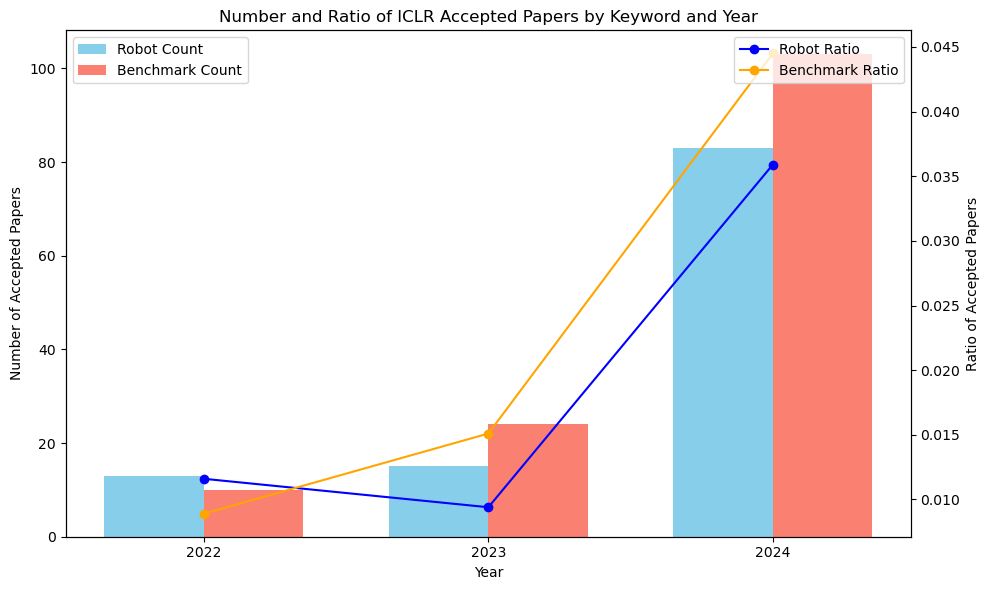

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data structure
data = {
    'year': [2022, 2023, 2024],
    'robot_count': [13, 15, 83],
    'benchmark_count': [10, 24, 103],
    'robot_ratio': [0.0116, 0.0094, 0.0359],
    'benchmark_ratio': [0.0089, 0.0151, 0.0445]
}


df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar width and positions
bar_width = 0.35
indices = range(len(df['year']))

# Plot bars for counts
ax1.bar([i - bar_width/2 for i in indices], df['robot_count'], width=bar_width, label='Robot Count', color='skyblue')
ax1.bar([i + bar_width/2 for i in indices], df['benchmark_count'], width=bar_width, label='Benchmark Count', color='salmon')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Accepted Papers')
ax1.set_xticks(indices)
ax1.set_xticklabels(df['year'])
ax1.legend(loc='upper left')

# Create a second y-axis for ratios
ax2 = ax1.twinx()
ax2.plot(indices, df['robot_ratio'], marker='o', color='blue', label='Robot Ratio')
ax2.plot(indices, df['benchmark_ratio'], marker='o', color='orange', label='Benchmark Ratio')
ax2.set_ylabel('Ratio of Accepted Papers')
ax2.legend(loc='upper right')

plt.title('Number and Ratio of ICLR Accepted Papers by Keyword and Year')
plt.tight_layout()
plt.show()